<a href="https://colab.research.google.com/github/pizybaker/aqi_predictor_project/blob/main/aqi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Aqi predictor**

## data

In [14]:
import pandas as pd
file_path= "https://raw.githubusercontent.com/pizybaker/aqi_predictor_project/refs/heads/main/aqi_data.csv"
df= pd.read_csv(file_path)
df_cleaned= df.dropna()
df_cleaned


,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61,1.3,8.7,22.2,200.645833
...,...,...,...,...,...,...,...,...,...
1088,18.1,24.0,11.2,1015.4,56,1.8,15.9,25.9,288.416667
1089,17.8,25.0,10.7,1015.8,54,2.3,9.4,22.2,256.833333
1090,13.9,24.5,11.4,1015.0,95,0.6,8.7,14.8,169.000000
1091,16.3,23.0,9.8,1016.9,78,1.1,7.4,16.5,186.041667


## data sep


In [15]:
y= df_cleaned["PM 2.5"]
y

,PM 2.5
0,219.720833
1,182.187500
2,154.037500
3,223.208333
4,200.645833
...,...
1088,288.416667
1089,256.833333
1090,169.000000
1091,186.041667


In [16]:
x= df_cleaned.drop("PM 2.5",axis=1)
x

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61,1.3,8.7,22.2
...,...,...,...,...,...,...,...,...
1088,18.1,24.0,11.2,1015.4,56,1.8,15.9,25.9
1089,17.8,25.0,10.7,1015.8,54,2.3,9.4,22.2
1090,13.9,24.5,11.4,1015.0,95,0.6,8.7,14.8
1091,16.3,23.0,9.8,1016.9,78,1.1,7.4,16.5


##data splitting

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=100)

In [18]:
x_train

,T,TM,Tm,SLP,H,VV,V,VM
414,25.1,30.8,19.0,1010.4,70,2.1,3.7,11.1
837,30.3,35.0,27.6,1002.6,83,2.3,6.5,16.5
163,17.0,26.6,10.0,1016.5,70,1.1,0.9,7.6
967,33.6,40.0,23.0,1003.8,27,2.4,9.8,18.3
494,31.4,36.5,27.6,1005.5,56,1.9,11.7,25.9
...,...,...,...,...,...,...,...,...
803,37.3,42.8,31.2,996.2,49,2.6,8.3,14.8
53,28.2,36.6,21.9,1007.1,45,1.9,6.5,16.5
351,17.2,27.8,9.8,1014.1,64,1.0,2.0,11.1
79,34.1,40.3,28.8,999.7,59,1.9,10.9,16.5


In [19]:
y_train


,PM 2.5
414,47.250000
837,26.583333
163,221.541667
967,109.625000
494,60.125000
...,...
803,94.375000
53,46.916667
351,223.375000
79,65.166667


#model building


##linear-regression

In [21]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
y_lr_train_pred= lr.predict(x_train)
y_lr_test_pred= lr.predict(x_test)
y_lr_train_pred

array([ 102.44712171,   30.15555933,  199.48216844,  103.34385196,
         69.92772485,  187.1687366 ,  110.00173363,   28.44450786,
        106.00445273,   72.64491425,   28.82735291,   53.9307496 ,
         32.82018073,  159.98171633,  152.88915652,   34.18492703,
       -101.90915214,  239.06633792,   37.7531136 ,   47.06823192,
        159.17847045,   21.11447341,   80.51119805,  174.02228101,
         32.55833165,  200.92723422,   28.61650706,   66.292522  ,
         67.44832874,  197.99364267,  162.66996471,   58.48630187,
         63.06058731,  173.12400693,  197.03524811,   48.34188397,
         85.16089754,   70.72045213,   88.50603959,   70.60574331,
         96.7737445 ,  163.72083539,  195.65521507,  143.41950015,
         55.82367468,  119.01150918,   98.37639197,  140.26819283,
         16.92876965,   57.0872064 ,  188.39748838,  144.02561045,
         70.27004034,   91.55211483,  113.65615438,  170.88891921,
        127.02400377,   66.292522  ,   59.60192961,  177.78336

In [23]:
y_lr_test_pred

array([ 200.68375355,  146.4016404 ,  163.99534361,   34.45237117,
         56.09019516,   71.86081164,   24.62127685,   15.03347748,
        130.5623482 ,   90.46549803,  119.15721478,  196.25565252,
         70.81757748,  181.49448146,   48.0028623 ,   95.52680233,
        128.99070795,   58.36544663,  142.09853958,   45.77393944,
        104.15489715,  129.16838912,  155.13872993,  195.28698352,
          7.90150756,  177.53614998,   64.07294018,   62.8703055 ,
        155.18599634,  131.52897514,  220.34370571,   94.91552543,
         41.5762451 ,  207.47506858,  148.0227836 ,   58.63261901,
        117.4379701 ,   63.06890188,  167.26208646,   99.31168279,
        181.55694754,  176.30008347,  101.57136493,  197.86593742,
        106.12833766,  141.46239284,  145.84713424,  180.34462727,
        107.78339601,   32.36046724,  110.9417455 ,  204.16834635,
        168.68587121,   62.31301841,   69.84996079,  190.21016636,
         28.82735291,  151.21047537,  231.97831614,  165.25898

#### finding mse, r2

In [25]:
from sklearn.metrics import mean_squared_error

lr_train_mse= mean_squared_error(y_train,y_lr_train_pred)
lr_test_mse= mean_squared_error(y_test,y_lr_test_pred)

In [26]:
lr_train_mse

3185.3712919994373

In [27]:
lr_test_mse

3901.539852540742

In [28]:
from sklearn.metrics import r2_score


train_r2 = r2_score(y_train, y_lr_train_pred)
test_r2 = r2_score(y_test, y_lr_test_pred)

print(f"Train R²: {train_r2}")
print(f"Test R²: {test_r2}")


Train R²: 0.5413676306677359
Test R²: 0.49848535465397215


# data-visualization

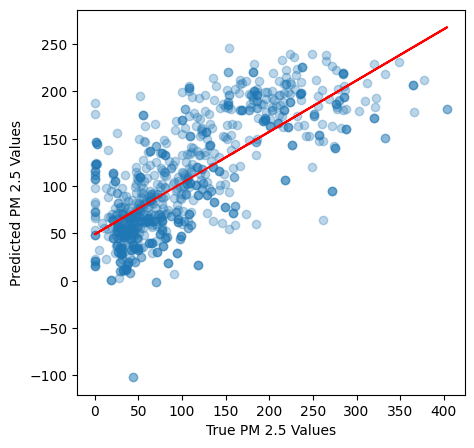

In [29]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)


plt.plot(y_train, p(y_train), color="red")

plt.xlabel("True PM 2.5 Values")
plt.ylabel("Predicted PM 2.5 Values")

plt.show()


#predictions-test


In [38]:
new_data = pd.DataFrame({
    'T': [7.4, 7.8, 6.7, 8.6],
    'TM': [9.8, 12.7, 13.4, 15.5],
    'Tm': [4.8, 4.4, 2.4, 3.3],
    'SLP': [1017.6, 1018.5, 1019.4, 1018.7],
    'H': [93, 87, 82, 72],
    'VV': [0.5, 0.6, 0.6, 0.8],
    'V': [4.3, 4.4, 4.8, 8.1],
    'VM': [9.4, 11.1, 11.1, 20.6]
})


y_pred = lr.predict(new_data)

print("Predicted PM 2.5 values:", y_pred)


Predicted PM 2.5 values: [223.09396529 229.12957044 246.0361489  239.68009026]
